In [1]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


/media/paulati/Nuevo vol/paula/dh/2021/dsad_2021_paula/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


In [2]:
# NOTA: Esta es la forma de armar html con algun contenido dinamico. No borrar porque sirve como ejemplo

# cargo los estilos y la portada:

#css_path = '../../../common/dhds.css'

#raw_html = '<div class="Table">' \
#    '<div class="Row">' \
#        '<div class="Cell grey left"> <img src="' + gs.images_base_url + 'M1/CLASE_02_Python1/Presentacion/img/M1_CLASE_02_portada.png" align="center" /></div>' \
#        '<div class="Cell right">' \
#            '<div class="div-logo"><img src="' + gs.images_base_url + 'common/logo_DH.png" align="center" width=70% /></div>' \
#            '<div class="div-curso">DATA SCIENCE</div>' \
#            '<div class="div-modulo">MÓDULO 1</div>' \
#            '<div class="div-contenido">Entornos (Conda y Jupyter Notebooks) <br/> Repaso de Python</div>' \
#        '</div>' \
#    '</div>' \
#'</div>'        


In [3]:
# importante: tagear como slide to remove y generar por linea de comandos 
#from IPython.display import HTML as html
#html("<link rel='stylesheet' href='" + css_path + "'>" + raw_html)

<link rel="stylesheet" href='../../../common/dhds.css'>
<div class="Table">
    <div class="Row">
        <div class="Cell grey left"> <img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_20_Intro_ML_1/Presentacion/img/M3_CLASE_20_portada.png" align="center" width=90% alt="Portada"/> </div >                
    <div class="Cell right">
            <div class="div-logo"><img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/common/logo_DH.png" align="center" width=70% /></div> 
            <div class="div-curso">DATA SCIENCE</div>
            <div class="div-modulo">MÓDULO 3</div>            
            <div class="div-contenido">Introducción a Machine Learning 2</div>        
        </div>
    </div>    
</div>        

## Agenda

---

- Repasar los conceptos de aprendizaje supervisado y  no supervisado

- Presentar ejemplos de modelos de aprendizaje supervisado y  no supervisado

    - aprendizaje supervisado: Clasificación

    - aprendizaje no supervisado: Clustering

In [4]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets

<div class="div-dhds-fondo-1">  Aprendizaje supervisado
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M1/CLASE_05_Pandas1/Presentacion/img/M1_CLASE_05_separador.png" align="center"></img>    
</div>


###  Aprendizaje supervisado - repaso

---

Los algoritmos de aprendizaje supervisado usan tanto las **features** de las observaciones como la variable **target** asociada. 

Cuando llega una nueva observación (con sus features), el modelo *predice el valor del target asociado*.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_18_Intro_ML_1/Presentacion/img/M3_CLASE_18_supervisado.jpg" align="center" alt="tablon" width=70% height=40% />

<a href="https://www.newtechdojo.com/list-machine-learning-algorithms/" target="_blank">https://www.newtechdojo.com/list-machine-learning-algorithms/</a>

###  Aprendizaje supervisado - repaso

---

La **supervisión** del aprendizaje se produce cuando usamos el modelo para predecir el target de determinada observación **basados en otras observaciones cuyo target conocemos de antemano**. 

Disponemos tanto del **valor real** del target como del **valor predicho** y los podemos comparar. 

Si la variable objetivo es una **variable continua (o cuantitativa)** se trata de un modelo de **regresión**. 

Si la variable objetivo es una **variable categórica (o cualitativa)**, nos encontramos ante un caso de **clasificación**.

<div class="div-dhds-fondo-1"> Clasificación
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_18_Intro_ML_1/Presentacion/img/M3_CLASE_18_separador.png" align="center"></img>    
</div>

###  Clasificación

---
Los métodos de clasificación se pueden usar en aplicaciones tipo:

- Predicción de bajas de clientes a la suscripción de un servicio (modelos de *churn*)

- Distinción de comentarios positivos y negativos en redes sociales

- Filtros de _spam_ en servicios de correo electrónico

- Diagnóstico de enfermedades

- Detección de fraudes de tarjeta de crédito

###  Naive Bayes

---
Hagamos un ejemplo con un algoritmo simple de clasificación, **Naive Bayes**.

Asume que todas las features *son independientes entre sí*.

Se basa en probabilidades. 

Es un modelo que se usa *de base*; su performance es un piso para los demás modelos.

<p style="font-size:14px; font-style:italic;">
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_20_Intro_ML_1/Presentacion/img/M3_CLASE_20_bayes.png" align="center" alt="bayes" width=40% />
Bayes, Thomas (1763)
</p>    

### Dataset

---
Disponemos un dataset de semillas de trigo, con algunas de sus características.

Como *variable target*, usamos el tipo de variedad: *1 - Kama, 2 - Rosa, 3 - Canadian*.

Para consultar detalles del dataset <a href="https://archive.ics.uci.edu/ml/datasets/seeds#" target="_blank">aquí</a>.

In [5]:
df_trigo = pd.read_csv('../Data/seeds_dataset.csv')
print('Shape: ', df_trigo.shape)
df_trigo.sample(3)

Shape:  (210, 8)


,area,perimeter,compactness,length,width,coefficient,length_groove,type_wheat
157,12.13,13.73,0.8081,5.394,2.745,4.825,5.220,3
194,12.11,13.27,0.8639,5.236,2.975,4.132,5.012,3
160,12.54,13.67,0.8425,5.451,2.879,3.082,5.491,3


In [6]:
df_trigo.type_wheat.unique()

array([1, 2, 3])

In [7]:
df_trigo.describe()

,area,perimeter,compactness,length,width,coefficient,length_groove,type_wheat
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


### Ejemplo

---
Como vimos en la clase anterior, aplicamos los siete pasos típicos de la metodología para generar el modelo.

In [8]:
from sklearn.naive_bayes import GaussianNB # 1. Seleccionar una clase de modelo

Dejamos los hiperparámetros por default.

In [9]:
model = GaussianNB() # 2. Elegir los hiperparámetros del modelo. 

La *matriz X de features* son todas las variables menos *type_wheat*, variedad de trigo, que es la *variable target* a predecir.

In [10]:
X = df_trigo.drop(['type_wheat'], axis=1) # 3. Preparar matriz de *features* y vector *target*
y = df_trigo['type_wheat']

In [11]:
# 4. Separar los sets de entrenamiento y de testing
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,random_state=2)

El modelo aprende a partir de los datos de **train**.

In [12]:
model.fit(Xtrain, ytrain) # 5. Ajustar el modelo a los datos de entrenamiento

GaussianNB()

Con el modelo entrenado, vamos a predecir las etiquetas del conjunto de test:

In [13]:
ypred = model.predict(Xtest) # 6. Predecir etiquetas para datos desconocidos
ypred

array([1, 3, 1, 3, 1, 3, 1, 1, 1, 3, 1, 3, 3, 3, 2, 2, 1, 3, 3, 2, 1, 2,
       1, 3, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 3, 1, 2,
       3, 1, 3, 2, 2, 3, 2, 2, 1])

Calculamos una métrica para evaluar la performance.

Accuracy (precisión) es la proporción de predicciones correctas (tanto verdaderas positivas como verdaderas negativas) entre el número total de casos examinados.

<p style="font-size:20px;">
$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$
</p>        

$TP$: True Positive, predicho como postivo y con valor positivo

$TN$: True Negative, predicho como negativo y con valor negativo

$FP$: False Positive, predicho como postivo y con valor negativo

$FN$: False Negative, predicho como negativo y con valor positivo    



In [14]:
from sklearn.metrics import accuracy_score # 7. Evaluar la *performance* del modelo
round(accuracy_score(ytest, ypred), 2)

0.87

Obtenemos un valor de **accuracy del 87%**, es decir que 87 de cada 100 casos fueron correctamente predichos. 

<div class="div-dhds-fondo-1">  Aprendizaje no supervisado
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M1/CLASE_05_Pandas1/Presentacion/img/M1_CLASE_05_separador.png" align="center"></img>    
</div>


###  Aprendizaje no supervisado - repaso

---
A diferencia de lo que ocurre en el caso de los algoritmos de regresión o clasificación, el aprendizaje no supervisado **se caracteriza por prescindir de una variable target**. 

El algoritmo genera los labels o target para cada observación. 

El foco está puesto en descubrir patrones o grupos en la información que a priori, no son evidentes.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_18_Intro_ML_1/Presentacion/img/M3_CLASE_18_nosupervisado.jpg" align="center" alt="no supervisado" width=70% height=40% />

<a href="https://www.newtechdojo.com/list-machine-learning-algorithms/" target="_blank">https://www.newtechdojo.com/list-machine-learning-algorithms/</a>

###  Clustering

---

El objetivo básico de los algoritmos de _clustering_ es **descubrir grupos o patrones en los datos**:

* Agrupando observaciones **similares**.
* Generando grupos distintos entre sí. Y en general, disjuntos.

Las observaciones son asignadas a uno de los grupos. 

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_20_Intro_ML_1/Presentacion/img/M3_CLASE_20_clustering_001.PNG" align="center" alt="clustering 001" width=70% height=40% />

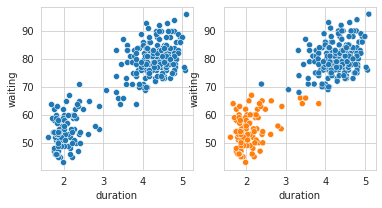

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

geyser = sns.load_dataset('geyser')
sns.set_style('whitegrid')
fig, axs = plt.subplots(1, 2, figsize=(6, 3))
sns.scatterplot(data=geyser, x='duration', y='waiting', ax=axs[0])
sns.scatterplot(data=geyser, x='duration', y='waiting', hue=geyser.kind.tolist(), ax=axs[1], legend=False);
plt.show()

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_20_Intro_ML_1/Presentacion/img/M3_CLASE_20_clustering_002.png" align="center" alt="clustering 001" width=70% height=40% />

Otros ejemplos:

- Segmentación de productos.
- Procesamiento de imagenes.
- Astronomía.
- Búsqueda de outliers, valores atípicos.


<div class="div-dhds-fondo-1">  K-means
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M1/CLASE_05_Pandas1/Presentacion/img/M1_CLASE_05_separador.png" align="center"></img>    
</div>


###  K-means

---
Vamos a aplicar una **técnica clásica de _clustering_** llamada **K-Means**. 

Este algoritmo genera grupos de observaciones similares entre sí *sin tener una variable target*.

La cantidad de _clusters_ que obtenemos **debe ser especificada de antemano**. 


###  K-means

---

Divide el dataset en K grupos de observaciones **disjuntos**.

K es **provisto por nosotros**.

Usa **la distancia** para determinar la similaridad entre las observaciones.

Cada grupo se define por su **mean**, media, representado por el **centroide**, un punto que no necesariamente es una observación.

Cada observación pertenece al grupo cuyo centroide es el más cercano.

Realiza varias **iteraciones** hasta converger al modelo entrenado.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_20_Intro_ML_1/Presentacion/img/centroids_iterations.webp" align="center" alt="clustering 001" width=70% height=40% />

https://realpython.com/k-means-clustering-python/

### Dataset

---
Usamos un dataset que indica el salario medio según los años de experiencia.

Para consultar detalles del dataset <a href="https://www.kaggle.com/rohankayan/years-of-experience-and-salary-dataset">aquí</a>.

In [16]:
df_salary = pd.read_csv('../Data/Salary_Data.csv')
df_salary.head(2)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0


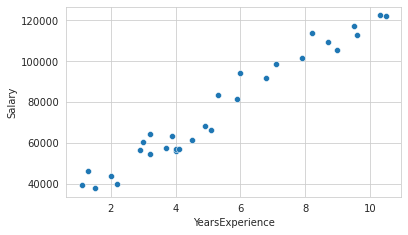

In [17]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(6,3.5))
sns.scatterplot(data=df_salary, x='YearsExperience', y='Salary')
plt.show()

### Ejemplo

---
Aplicamos los pasos típicos del workflow de scikit-learn para generar el modelo.

In [18]:
from sklearn.cluster import KMeans # 1. Seleccionar una clase de modelo

* n_clusters define *cuántos clusters queremos obtener*.

In [19]:
kmeans = KMeans(n_clusters=4) # 2. Elegir los hiperparámetros del modelo

El algoritmo *calcula distancias* para determinar la similitud entre las observaciones. 

Para ello, debemos **estandarizar los valores** para que todas las features queden en la misma escala.

La clase **`StandardScaler()`**, transforma los datos, para que las variables tengan *media 0 y desvío estándar 1*.

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X = df_salary
X_scaled=scaler.fit_transform(X) # X_scaled son los datos transformados

Ajustamos el modelo a los datos estandarizados. No requerimos de dataset de train y test.

In [21]:
kmeans.fit(X_scaled) # 5. Ajustar el modelo a los datos

KMeans(n_clusters=4)

Obtenemos parámetros del modelo:

* labels_ : vector con la asignación del cluster a cada observación.
* centers_ : Coordenadas de los centroides.

In [22]:
labels = kmeans.labels_ 
centroids = kmeans.cluster_centers_

Graficamos los clusters y sus centroides.

Observar que la escala de las variables está **estandarizada**.

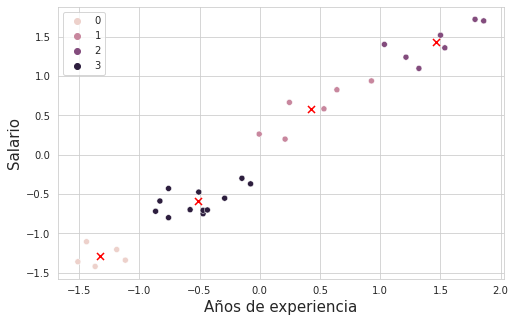

In [23]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_scaled[:,0],y=X_scaled[:,1],hue=labels,legend='full');
plt.xlabel('Años de experiencia',fontsize=15);plt.ylabel('Salario',fontsize=15);
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=50,color='r');

<div class="div-dhds-fondo-1"> Hands-on
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_18_Intro_ML_1/Presentacion/img/M3_CLASE_18_separador.png" align="center"></img>    
</div>

###  Ejercicio

---
Generemos un modelo de clasificación usando la técnica de Naive Bayes.

Usaremos el dataset de propinas que provee seaborn, para predecir si el cliente es fumador a partir del total de la cuenta y la propina.

`tips = sns.load_dataset("tips")`

**"X"**, el conjunto de features, se construye solo con las variables *total_bill* y *tips*.

*smoker* será nuestra variable target **"y"**.

Para consultar detalles del dataset <a href="https://www.kaggle.com/ranjeetjain3/seaborn-tips-dataset">aquí</a>.

In [24]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets

In [25]:
df = sns.load_dataset('tips')
df_tips = df.drop(['sex', 'day', 'time','size'], axis=1)
print(df_tips.shape)
df_tips.sample(2)

(244, 3)


,total_bill,tip,smoker
165,24.52,3.48,No
237,32.83,1.17,Yes


In [26]:
df_tips.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00


Ninguna variable tiene nulos.

In [27]:
df_tips.isnull().sum()

total_bill    0
tip           0
smoker        0
dtype: int64

Generamos un diagrama de dispersión, con el color indicando la variable *smoker*.

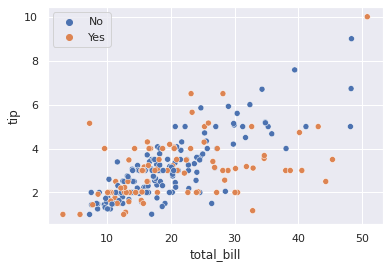

In [28]:
sns.set(style="darkgrid")
sns.scatterplot(x = "total_bill", y = "tip", hue=df_tips.smoker.tolist(), data = df_tips)
plt.show()

Aplicamos los siete pasos típicos para generar el modelo.

Seleccionamos la clase de modelos Naive Bayes y el método Gaussiano.

In [29]:
# quitar el símbolo de comentario y completar:
# from 

 Dejamos los hiperparámetros por default.

La *matriz X de features* son todas las variables menos *smoker*, que es la *variable target* a predecir.

In [30]:
# quitar los símbolos de comentario y completar:
# X = 
# y = 

Separamos los sets de entrenamiento y de testing

In [31]:
from sklearn.model_selection import train_test_split

# quitar el símbolo de comentario y completar:
# Xtrain, Xtest, ytrain, ytest = 

El modelo aprende a partir de los datos de **train**.

In [32]:
#

Con el modelo entrenado, vamos a predecir las etiquetas del conjunto de test:

In [33]:
# quitar los símbolos de comentario y completar:

# ypred = 
# ypred

Para evaluar la performance del modelo, calcular *accuracy* entre los valores reales y los predichos.

In [34]:
from sklearn.metrics import accuracy_score
#

###  Preguntas sobre el modelo 

---

- Que piensan del valor accuracy = 0.72? Es una buena performance?

- Les parece que alcanza con una sola medida de performance?

- Considerando que Naive Bayes es usado como modelo "base", cómo creen que será la performance de otros modelos de clasificación?

### Solución

----

Generamos un modelo de clasificación usando la técnica de Naive Bayes.

Usamos el dataset de propinas que provee seaborn, para predecir si el cliente es fumador a partir del total de la cuenta y la propina.

`tips = sns.load_dataset("tips")`

**"X"**, el conjunto de features, se construye solo con las variables *total_bill* y *tips*.

*smoker* será nuestra variable target **"y"**.

Para consultar detalles del dataset <a href="https://www.kaggle.com/ranjeetjain3/seaborn-tips-dataset" target="_blank">aquí</a>.

In [35]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets

In [36]:
df = sns.load_dataset('tips')
df_tips = df.drop(['sex', 'day', 'time','size'], axis=1)
print(df_tips.shape)
df_tips.sample(2)

(244, 3)


,total_bill,tip,smoker
105,15.36,1.64,Yes
106,20.49,4.06,Yes


In [37]:
df_tips.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00


Ninguna variable tiene nulos.

In [38]:
df_tips.isnull().sum()

total_bill    0
tip           0
smoker        0
dtype: int64

Generamos un diagrama de dispersión, con el color indicando la variable *smoker*.

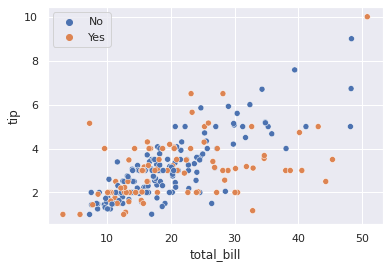

In [39]:
sns.set(style="darkgrid")
sns.scatterplot(x = "total_bill", y = "tip", hue=df_tips.smoker.tolist(), data = df_tips)
plt.show()

Aplicamos los siete pasos típicos de la metodología para generar el modelo.

In [40]:
from sklearn.naive_bayes import GaussianNB # 1. Seleccionar una clase de modelo

Dejamos los hiperparámetros por default.

In [41]:
model = GaussianNB() # 2. Elegir los hiperparámetros del modelo. 

La *matriz X de features* son todas las variables menos *smoker*, que es la *variable target* a predecir.

In [42]:
X = df_tips.drop(['smoker'], axis=1) # 3. Preparar matriz de *features* y vector *target*
y = df_tips['smoker']

In [43]:
# 4. Separar los sets de entrenamiento y de testing
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=2)

El modelo aprende a partir de los datos de **train**.

In [44]:
model.fit(Xtrain, ytrain) # 5. Ajustar el modelo a los datos de entrenamiento

GaussianNB()

Con el modelo entrenado, vamos a predecir las etiquetas del conjunto de test:

In [45]:
ypred = model.predict(Xtest) # 6. Predecir etiquetas para datos desconocidos
ypred

array(['Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No'], dtype='<U3')

Calculamos una métrica para evaluar la performance.

In [46]:
from sklearn.metrics import accuracy_score # 7. Evaluar la *performance* del modelo
round(accuracy_score(ytest, ypred), 2)

0.72

Obtenemos un valor de **accuracy del 72%**, es decir que 72 de cada 100 casos fueron correctamente predichos. 

###  Preguntas sobre el modelo 

---

- Que piensan del valor accuracy = 0.72? Es una buena performance?

Siempre hay que pensar que la performance se mide sobre el archivo de test, es decir, sobre los datos no vistos por el modelo. En este caso, predecir en casi tres de cada cuatro es una performance razonable. Se puede mejorar.

- Les parece que alcanza con una sola medida de performance?

No. Siempre mejor evaluar el modelo con varias medidas de performance.

- Considerando que Naive Bayes es usado como modelo "base", cómo creen que será la performance de otros modelos de clasificación?

Podemos que Naive Bayes tiene una performance "promedio" y que en general otros modelos de clasificación la mejoran.

<div class="div-dhds-fondo-1"> Referencias y Material Adicional
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_18_Intro_ML_1/Presentacion/img/M3_CLASE_18_separador.png" align="center"></img>    
</div>

### Referencias y Material Adicional

---

Introduction to Machine Learning with Python. Andreas C. Müller, Sarah Guido. O’Reilly Media.

An Introduction to Statistical Learning with Applications in R. Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani. Springer.

<a href ="https://scikit-learn.org/stable/supervised_learning.html#supervised-learning" tagert="_blank">Scikit-learn. Aprendizaje Supervisado</a>

<a href ="https://scikit-learn.org/stable/unsupervised_learning.html" tagert="_blank">Scikit-learn. Aprendizaje no Supervisado</a>